In [19]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [20]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt  # Fixed typo: "pyolot" to "pyplot"
import os
import re
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors  # Fixed typo: "NearestNeighbours" to "NearestNeighbors"
from sklearn.decomposition import PCA


In [21]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)


In [22]:
def embed(texts) :
    return model(texts) 


In [23]:
df = pd.read_csv('styles.csv')

In [24]:
df = df[["id","productDisplayName"]]

In [25]:
df.head()

,id,productDisplayName
0,15970,Turtle Check Men Navy Blue Shirt
1,39386,Peter England Men Party Blue Jeans
2,59263,Titan Women Silver Watch
3,21379,Manchester United Men Solid Black Track Pants
4,53759,Puma Men Grey T-shirt


In [26]:
df = df.dropna()
df = df.reset_index()
df = df[:6000]

In [27]:
df.size

18000

In [28]:
titles = list(df["productDisplayName"]) 

In [29]:
embeddings = embed(titles)

In [30]:
nn = NearestNeighbors(n_neighbors = 10) 
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [31]:
def reccomend(text) :
    emb = embed([text]) 
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    return df["id"].iloc[neighbors].tolist()

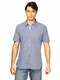

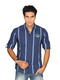

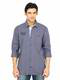

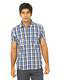

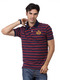

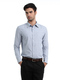

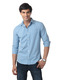

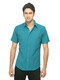

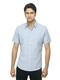

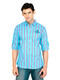

In [32]:
from PIL import Image
import os
from IPython.display import display

req = reccomend("Men navy blue shirt") 
for i in range(0,len(req)) :
    req[i] = str(req[i])+".jpg"
folder_path = 'images'


file_list = os.listdir(folder_path)

for i in range(0,len(req)) :
    image_path = os.path.join(folder_path, req[i])
    img = Image.open(image_path)
    display(img)



